In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dia = load_diabetes()

In [9]:
dia.data.shape

(442, 10)

In [15]:
x = dia.data[:,2]
y = dia.target

In [16]:
import matplotlib.pyplot as plt

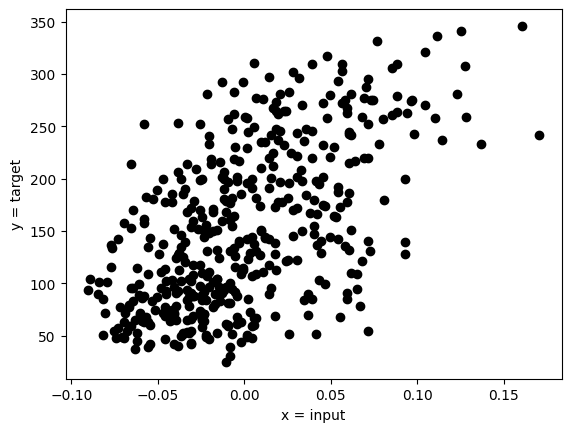

In [18]:
plt.scatter(x, y, color = 'black')
plt.xlabel('x = input')
plt.ylabel('y = target')
plt.show()

In [19]:
class Neuron:
  def __init__(self):                             # 멤버 변수, 멤버 함수 초기화
    self.w = 1.0                                  # 가중치(weight) 임의로 초기화
    self.b = 1.0                                  # 절편(bias) 임의로 초기화

  def forward(self, x):                           # 정방향(forward propagation) 계산
    y_hat = self.w * x + self.b                   # 오차(err) 계산을 위한 예측 계산
    return y_hat

  def backprop(self, x, err):                     # 역방향(backward propagation) 계산
    w_grad = x * err                              # 가중치에 대한 Gradient 계산
    b_grad = 1 * err                              # 절편에 대한 Gradient 계산
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):              # 훈련 위한 fit() 함수 구현
    for i in range(epochs):                       # 훈련 반복 횟수
      for x_i, y_i in zip(x, y):                  # 모든 data에 대해 학습
        y_hat = self.forward(x_i)                 # 예측 위한 정방향 계산
        err = -(y_i - y_hat)                      # 오차 계산 (y_i - y_hat)과 동일
        w_grad, b_grad = self.backprop(x_i, err)  # w, b 각각 Gradient 계산
        self.w -= w_grad                          # 가중치 update
        self.b -= b_grad                          # 절편 update

In [21]:
neuron = Neuron()                                 # Neuron Class 객체 생성
neuron.fit(x, y)                                  # 훈련 시작

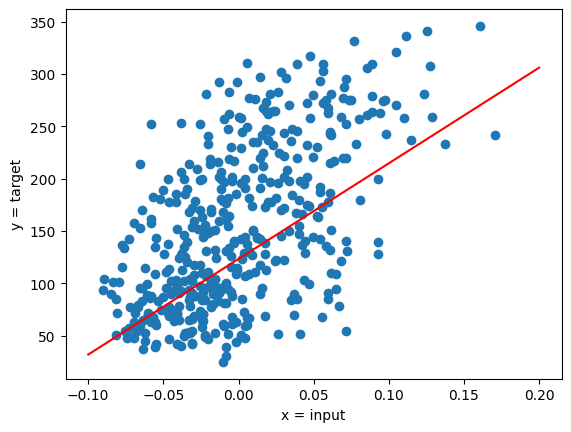

In [24]:
plt.scatter(x, y)
cord1 = (-0.1, -0.1 * neuron.w + neuron.b)        # 직선의 첫번째 점 좌표
cord2 = (0.2, 0.2 * neuron.w + neuron.b)          # 직선의 마지막 점 좌표
plt.plot([cord1[0],cord2[0]],[cord1[1],cord2[1]], color = 'red')
plt.xlabel('x = input')
plt.ylabel('y = target')
plt.show()